### Dicky-Fuller Test
### Granger Causality Tests
### AIC/BIC Metrics

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [45]:
df1 = pd.read_csv(r'./dataset-studying/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'  

df2 = pd.read_csv(r'./dataset-studying/DailyTotalFemaleBirths.csv')
df2.index.freq = 'D'

In [46]:
adfuller(df1["Thousands of Passengers"])

(np.float64(0.8153688792060482),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [47]:
dftest = adfuller(df1["Thousands of Passengers"])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [48]:
for key, value in dftest[4].items():
    dfout['Critical Value (%s)' % key] = value

<Axes: >

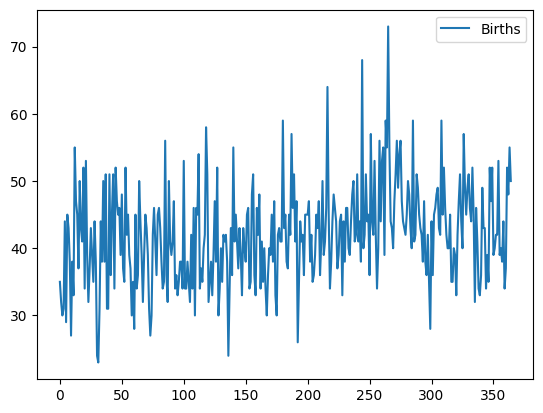

In [49]:
df2.plot()

In [50]:
def adf_test(series):
    if adfuller(series)[1] <= 0.05:
        print("ADF Test Statistic: ", adfuller(series)[0])
        print("p-value: ", adfuller(series)[1])
        print("The series is stationary.")
    else:
        print("ADF Test Statistic: ", adfuller(series)[0])
        print("p-value: ", adfuller(series)[1])
        print("The series is not stationary.")

adf_test(df2["Births"])

ADF Test Statistic:  -4.808291253559763
p-value:  5.243412990149865e-05
The series is stationary.


In [51]:
df3 = pd.read_csv(r'.\dataset-studying\samples.csv', index_col=0, parse_dates=True)
df3.index.freq = 'MS'

In [52]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<Axes: >

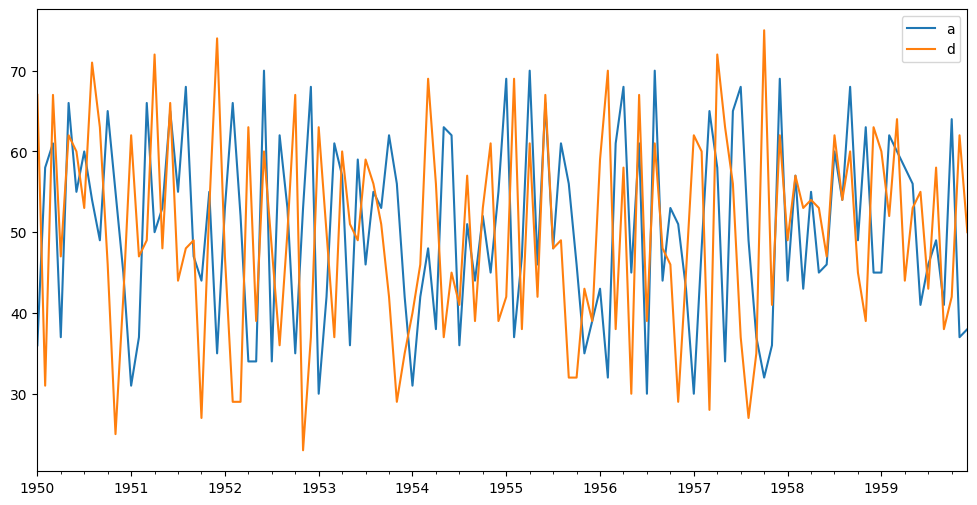

In [53]:
df3[["a","d"]].plot(figsize=(12, 6))

<Axes: >

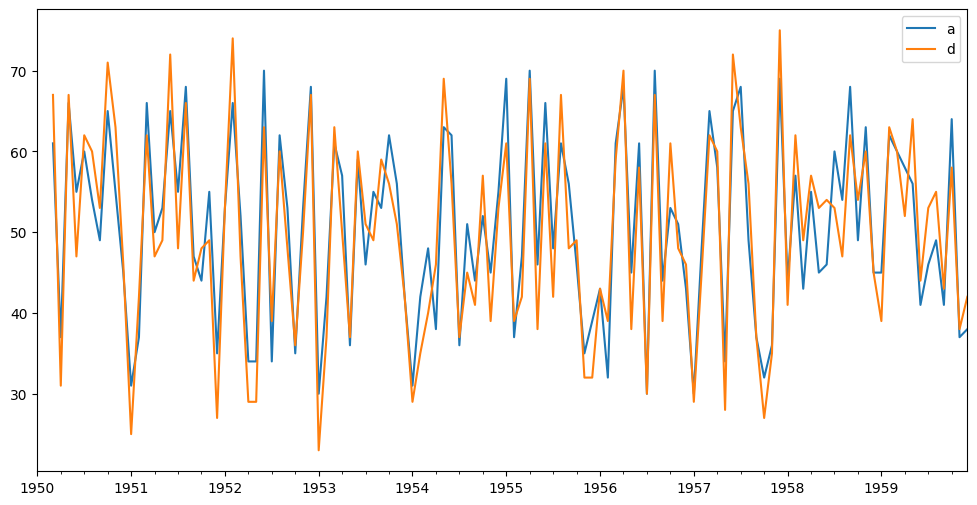

In [54]:
df3["a"].iloc[2:].plot(figsize=(12, 6), label='a',legend=True)
df3["d"].shift(2).plot(legend=True)

In [55]:
#  Granger Causality Test
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df3[["b", "d"]], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [56]:
# -> No casuality between b and d
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20,30,(50,2)), columns=['test', 'predict'])

In [57]:
df.head()

,test,predict
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


<Axes: title={'center': 'test vs predict'}>

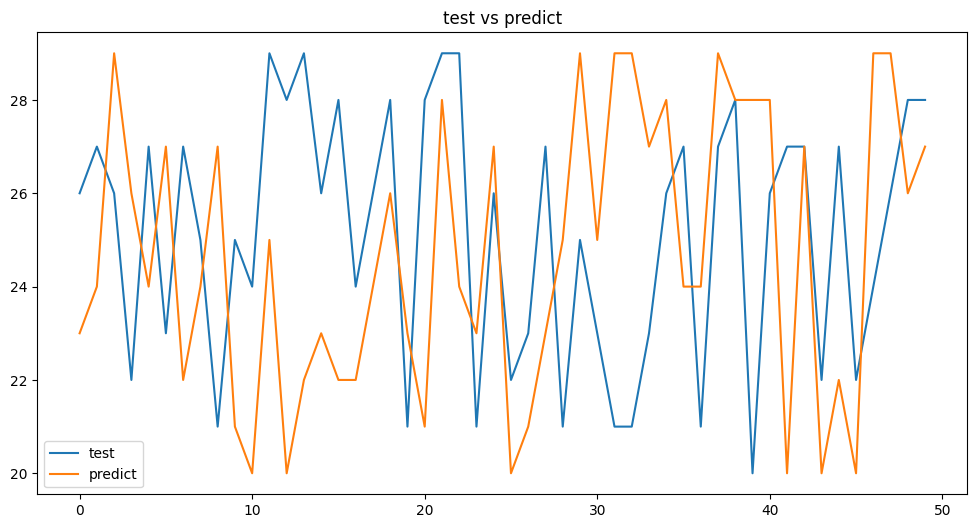

In [58]:
df.plot(figsize=(12, 6), title='test vs predict', label='test', legend=True)

In [59]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [60]:
meanabs(df["test"],df["predict"])

np.float64(3.54)

<Axes: xlabel='Month'>

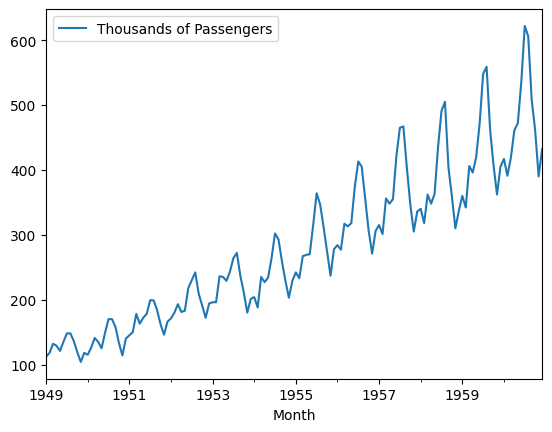

In [61]:
df1.plot()

In [62]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

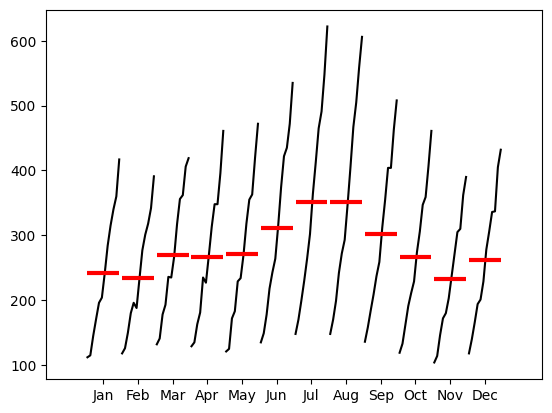

In [63]:
month_plot(df1["Thousands of Passengers"]);

In [64]:
dfq = df1["Thousands of Passengers"].resample(rule='Q').mean()

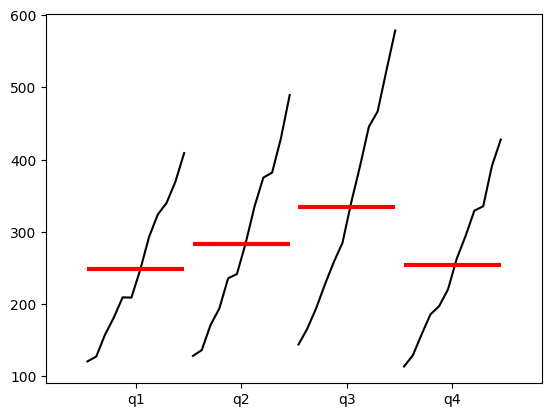

In [66]:
quarter_plot(dfq);